In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
data = pd.read_csv('Mall_customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [25]:
df = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [26]:
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [27]:
df.shape

(200, 2)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

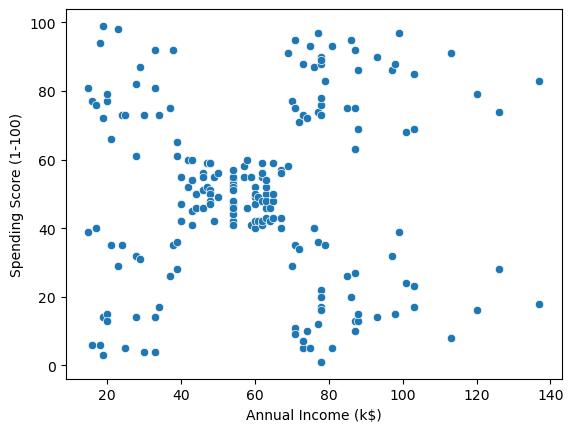

In [6]:
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df)

In [7]:
# Finding the value of K using the Elbow method

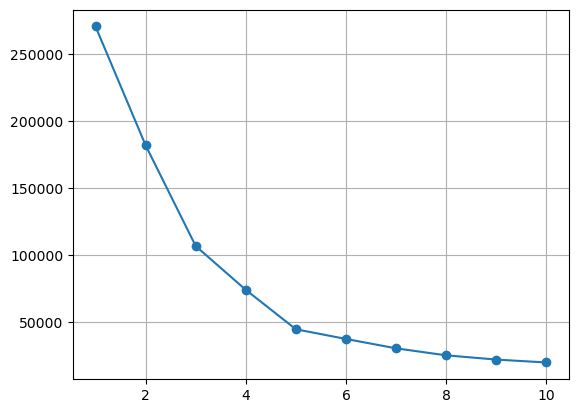

In [32]:
from sklearn.cluster import KMeans

wcss = []   # within clusters sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker = 'o')
plt.grid()
plt.show()

In [18]:
kmeans = KMeans(n_clusters = 5)
clusters = kmeans.fit_predict(df)
clusters

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1,
       2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 0, 1, 0, 3, 0, 3, 0,
       1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

In [19]:
kmeans.cluster_centers_

array([[8.65384615e+01, 8.21282051e+01, 1.00000000e+00],
       [5.52962963e+01, 4.95185185e+01, 1.92592593e+00],
       [2.63043478e+01, 2.09130435e+01, 3.00000000e+00],
       [8.82000000e+01, 1.71142857e+01, 6.66133815e-16],
       [2.57272727e+01, 7.93636364e+01, 2.00000000e+00]])

In [30]:
df['clusters'] = clusters 
df

,Annual Income (k$),Spending Score (1-100),clusters
0,15,39,2
1,15,81,4
2,16,6,2
3,16,77,4
4,17,40,2
...,...,...,...
195,120,79,0
196,126,28,3
197,126,74,0
198,137,18,3


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

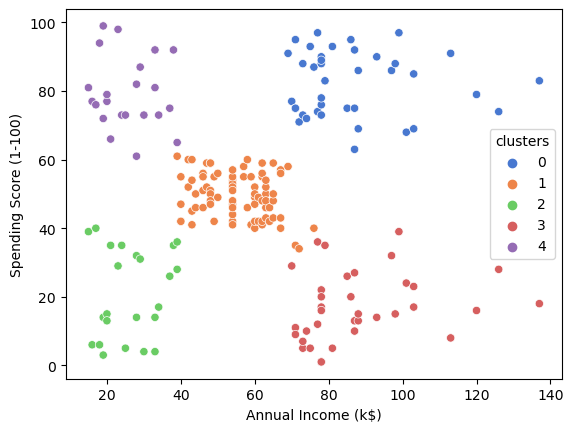

In [31]:
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'clusters', data = df,palette='muted')

In [35]:
df[df['clusters'] == 1]

,Annual Income (k$),Spending Score (1-100),clusters
43,39,61,1
46,40,55,1
47,40,47,1
48,40,42,1
49,40,42,1
...,...,...,...
121,67,40,1
122,69,58,1
126,71,35,1
132,72,34,1
